## Saikiran N. Pasikanti
### Naive Bayes Model

Use diamonds dataset in ggplot2 package and Perform Naive Bayes Classification.
- a)Divide the dataset into Train and Test Samples.
- b)Build Naive Bayes Model for classification of diamond$cut Variable.
- c)Find Confusion Matrix and Give accuracy, precision and recall.

In [2]:
################  READING THE DATASET                  ######################
library(ggplot2)                                       # Back up of Original dataset
data("diamonds")                                       # loading the diamonds data set from ggplot2 package
data <- diamonds                                       # saving the data set as data

In [3]:
head(data)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [4]:
dim(data)

[1] 53940    10

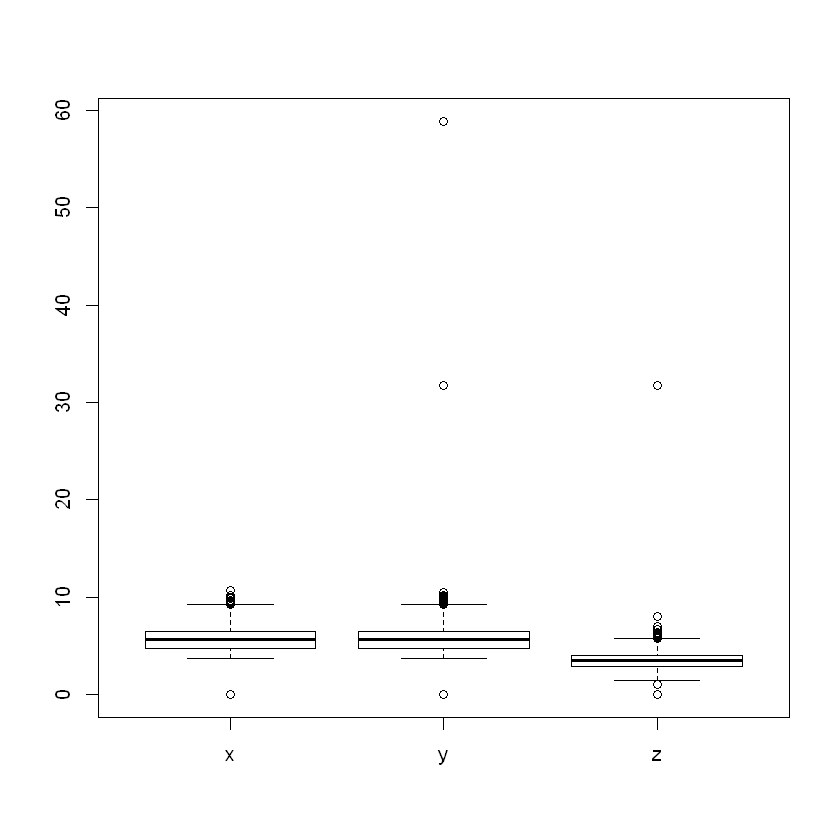

In [5]:
## Cleaning the Outliers
boxplot(data[,8:10])

In [6]:
data <- data[ !(data$x==0 | data$y==0 | data$z ==0 | data$y >=20 | data$y >=20 ), ]

dim(data)

[1] 53918    10

In [7]:
################  DATASET SPLITTING = TRAIN / TEST    ######################
## Train data = 75%, Test Data = 25%

library(caTools)                                      # load required library
set.seed(123)                                         # for reproducibility
split1  = sample.split(data$cut, SplitRatio = 0.75)
d.train = subset(data, split1 == TRUE)                # train data set
d.test  = subset(data, split1 == FALSE)               # test data set

In [8]:
################  NAIVEBAYES MODEL                    ######################
library(e1071)
nb.model <- naiveBayes(d.train[,-c(2)], d.train$cut)
nb.model
summary(nb.model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = d.train[, -c(2)], y = d.train$cut)

A-priori probabilities:
d.train$cut
      Fair       Good  Very Good    Premium      Ideal 
0.02984816 0.09090459 0.22407142 0.25555171 0.39962412 

Conditional probabilities:
           carat
d.train$cut      [,1]      [,2]
  Fair      1.0507539 0.5230845
  Good      0.8473912 0.4491622
  Very Good 0.8087783 0.4582954
  Premium   0.8909464 0.5183120
  Ideal     0.7058428 0.4350441

           color
d.train$cut          D          E          F          G          H          I
  Fair      0.10273405 0.13670257 0.18392709 0.20463960 0.18806959 0.10687655
  Good      0.13438520 0.18307943 0.18879217 0.18008705 0.13846572 0.11099021
  Very Good 0.12404812 0.19589449 0.17856749 0.18838980 0.15693632 0.10120296
  Premium   0.11757306 0.17011806 0.17002129 0.20930908 0.17002129 0.10489646
  Ideal     0.13483911 0.17920792 0.17797030 0.22431931 0.14603960 0.09511139
           colo

        Length Class  Mode     
apriori 5      table  numeric  
tables  9      -none- list     
levels  5      -none- character
call    3      -none- call     

In [9]:
# Lets predict this on test data
nb.pred <- predict(nb.model, d.test[-2])

In [10]:
# create confusion matrix
library(gmodels)

m2 <- CrossTable(d.test$cut, nb.pred, 
                 prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
                 dnn = c('Actual Default', 'RPART Predicted Default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  13480 

 
               | RPART Predicted Default 
Actual Default |      Fair |      Good | Very Good |   Premium |     Ideal | Row Total | 
---------------|-----------|-----------|-----------|-----------|-----------|-----------|
          Fair |       173 |       196 |        21 |        10 |         2 |       402 | 
               |     0.013 |     0.015 |     0.002 |     0.001 |     0.000 |           | 
---------------|-----------|-----------|-----------|-----------|-----------|-----------|
          Good |        98 |       248 |       508 |       178 |       194 |      1226 | 
               |     0.007 |     0.018 |     0.038 |     0.013 |     0.014 |           | 
---------------|-----------|-----------|-----------|-----------|-----------|-----------|
     Very Good |        42 |       106 |       802 |       916 |  

In [11]:
# Calculate Precision, Recall and Accuracy
library(caret)

print(confusionMatrix(data = nb.pred,  reference = d.test$cut))

Loading required package: lattice


Confusion Matrix and Statistics

           Reference
Prediction  Fair Good Very Good Premium Ideal
  Fair       173   98        42      20    33
  Good       196  248       106      70     7
  Very Good   21  508       802     579   162
  Premium     10  178       916    2002   638
  Ideal        2  194      1154     774  4547

Overall Statistics
                                          
               Accuracy : 0.5766          
                 95% CI : (0.5682, 0.5849)
    No Information Rate : 0.3996          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3879          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: Fair Class: Good Class: Very Good Class: Premium
Sensitivity              0.43035     0.20228           0.2656         0.5811
Specificity              0.98524     0.96907           0.8786         0.8264
Pos Pred Value           0.47268     0.39553        

In [ ]:
##################################################################################
## TP = True Positive Rate              Correctly identified as success
## TN = True Negative Rate              Correctly identified as failure
## FP = False Positive Rate             Success incorrectly identified as failure
## FN = False Negative Rate             Failure incorrectly idd as success
###################################################################################
##  Accuracy  = (TP+TN)/(TP+TN+FP+FN)
##  Precision =  TP/(TP + FP)
##  Recall    =  TP/(TP + FN)
##  
##
##
######### Overall Statistics
## Accuracy  = 0.5766 
##
##
##
######### Statistics by class
##                         Class: Fair  Class: Good  Class: Very Good  Class: Premium  Class: Ideal
# Accuracy                     0.70780     0.58568           0.5721         0.7038       0.7908
# Sensitivity/ Recall          0.43035     0.20228           0.2656         0.5811       0.8441
# Pos Pred Value/Precision     0.47268     0.39553           0.3871         0.5347       0.6816